# Speeding up ML algorithms with PCA

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
# Loading the preprocessed iris dataset
file_path = Path("../Resources/new_iris_data.csv")
df_iris = pd.read_csv(file_path)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Using PCA

In [3]:
# Standarize data with StandarScaler
iris_scaled = StandardScaler().fit_transform(df_iris)
print(iris_scaled[0:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [4]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the iris data.
iris_pca = pca.fit_transform(iris_scaled)

In [5]:
# Transform PCA data to a DataFrame
df_iris_pca = pd.DataFrame(
    data=iris_pca, columns=["principal component 1", "principal component 2"]
)
df_iris_pca.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [6]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## Running KMeans with PCA Data

C:\Users\Larissa\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


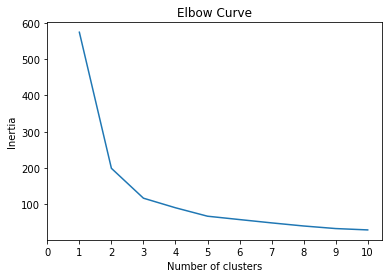

In [7]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

silhouette score for [2, 3, 4, 5, 6, 7, 8, 9, 10] clusters: 0.579
silhouette score for [2, 3, 4, 5, 6, 7, 8, 9, 10] clusters: 0.610
silhouette score for [2, 3, 4, 5, 6, 7, 8, 9, 10] clusters: 0.621
silhouette score for [2, 3, 4, 5, 6, 7, 8, 9, 10] clusters: 0.500
silhouette score for [2, 3, 4, 5, 6, 7, 8, 9, 10] clusters: 0.491
silhouette score for [2, 3, 4, 5, 6, 7, 8, 9, 10] clusters: 0.518
silhouette score for [2, 3, 4, 5, 6, 7, 8, 9, 10] clusters: 0.490
silhouette score for [2, 3, 4, 5, 6, 7, 8, 9, 10] clusters: 0.502
silhouette score for [2, 3, 4, 5, 6, 7, 8, 9, 10] clusters: 0.525


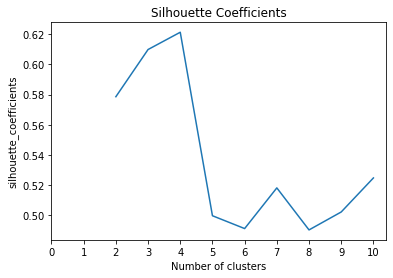

In [79]:
silhouette_coefficients = []
k = list(range(2, 11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster = kmeans.fit_predict(df_iris_pca)
    score = silhouette_score(df_iris_pca, cluster)
    silhouette_coefficients.append(score)
    print("silhouette score for", k, "clusters: " f'{score:.3f}')
    
# Plotting graph to choose the best number of clusters
# with the most Silhouette Coefficient score

#plt.style.use("fivethirtyeight")

coefficients_data = {"k": k, "silhouette_coefficients": silhouette_coefficients}
df_coefficients = pd.DataFrame(coefficients_data)

plt.plot(df_coefficients['k'], df_coefficients['silhouette_coefficients'])
plt.xticks(list(range(11)))
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()  

In [90]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_iris_pca)

# Predict clusters
predictions = model.predict(df_iris_pca)

# Add the predicted class column to the dataframe
df_iris_pca["class"] = model.labels_
df_iris_pca.head()

,principal component 1,principal component 2,class
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1


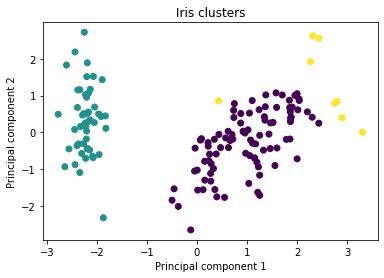

In [91]:
# Visualize the clusters
plt.scatter(x=df_iris_pca['principal component 1'], y=df_iris_pca['principal component 2'], c=df_iris_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Iris clusters')
plt.show()

In [92]:
# Calculate silhouette score
print(f'Silhouette Score(n=3): {silhouette_score(df_iris_pca, predictions)}')

Silhouette Score(n=3): 0.5853511641633872


## Running DBSCAN with PCA Data

In [93]:
# Predicting clusters with k=3

# Initialize the DBSCAN model
modeldb = DBSCAN(eps=0.621, min_samples=10)

# Fit the model
modeldb.fit(df_iris_pca)

# Predict clusters
predictionsdb = modeldb.fit_predict(df_iris_pca)

# Add the predicted class column to the dataframe
df_iris_pca["class"] = modeldb.labels_
df_iris_pca.head()

,principal component 1,principal component 2,class
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


In [94]:
# Array of size od no of rows.
core_samples_mask = np.zeros_like(modeldb.labels_, dtype=bool)
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [95]:
# labels
core_samples_mask[modeldb.core_sample_indices_]= True
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,

In [96]:
labels= modeldb.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

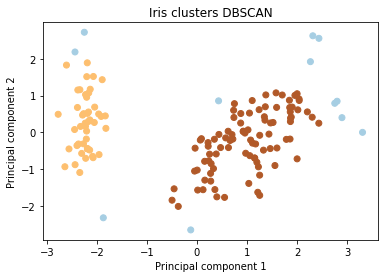

In [97]:
#Scatter plot
#plt.scatter(df_iris['petal_length'], df_iris['petal_width'], c=predictionsdb, cmap="Paired")
plt.scatter(df_iris_pca['principal component 1'], df_iris_pca['principal component 2'], c=predictionsdb, cmap="Paired")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Iris clusters DBSCAN')
plt.show()

In [98]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 2
Estimated number of noise points: 12


In [99]:
# Calculate silhouette score
print(f'Silhouette Score: {silhouette_score(df_iris_pca, predictionsdb)}')

Silhouette Score: 0.5848113635460023
